<a href="https://colab.research.google.com/github/ShirinTahmasebi/KTH-ID2223/blob/main/Project/3_plot_reduced_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
RESULT_DATASET_PATH = '/content/drive/MyDrive/Embedding with GPT-3/output/result_Reviews.csv'

In [70]:
engines = \
[
  'text-similarity-davinci-001',
  'text-similarity-ada-001',
  # 'text-similarity-babbage-001',
  # 'text-similarity-curie-001',
  # 'code-search-ada-code-001',
  # 'code-search-babbage-code-001'
]

In [71]:
import pandas as pd

df = pd.read_csv(RESULT_DATASET_PATH, index_col=0)

In [72]:
df

,embedding_text-similarity-davinci-001,reduced_x_text-similarity-davinci-001,reduced_y_text-similarity-davinci-001,embedding_text-similarity-ada-001,reduced_x_text-similarity-ada-001,reduced_y_text-similarity-ada-001,embedding_text-similarity-babbage-001,reduced_x_text-similarity-babbage-001,reduced_y_text-similarity-babbage-001,embedding_text-similarity-curie-001,reduced_x_text-similarity-curie-001,reduced_y_text-similarity-curie-001,embedding_code-search-ada-code-001,reduced_x_code-search-ada-code-001,reduced_y_code-search-ada-code-001,embedding_code-search-babbage-code-001,reduced_x_code-search-babbage-code-001,reduced_y_code-search-babbage-code-001,label
284932,"[-0.005729738622903824, 0.002782381372526288, ...",-12.561899,-1.853971,"[0.01860060915350914, -0.015613649971783161, -...",1.427269,-29.113115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
220697,"[-0.015217021107673645, 0.007462559267878532, ...",21.001913,-16.147696,"[0.018258072435855865, 0.03005059063434601, -0...",32.805073,5.747698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
107908,"[-0.004584628622978926, 0.01346516516059637, -...",-37.962326,-5.255630,"[-0.0005673975683748722, -0.012302356772124767...",13.984831,6.140154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
107800,"[0.0012591804843395948, 0.00389345595613122, -...",28.031458,-22.925604,"[0.01373705267906189, 0.053661659359931946, -0...",29.449331,-3.702063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
205313,"[-0.0032210019417107105, 0.0040468997322022915...",4.419676,-49.347170,"[0.021258626133203506, 0.007491868454962969, -...",41.380640,-33.534030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,"[-0.0005286579835228622, 0.0024464321322739124...",-10.699247,-1.548323,"[-0.016586609184741974, 0.03342374041676521, -...",-11.060517,-15.884715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
401972,"[-0.0002831067831721157, -0.003314807778224349...",18.233572,-45.071777,"[-0.016825618222355843, -0.00798442680388689, ...",40.454685,-43.195908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
462088,"[-0.0036534518003463745, 0.0004380333120934665...",-0.154786,34.669235,"[0.00622323714196682, 0.008891819044947624, -0...",-13.738024,31.157143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
267549,"[-0.005907019134610891, 0.0012909695506095886,...",-17.767220,-7.187458,"[0.012264199554920197, 0.022083846852183342, -...",-6.615088,-18.648104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [119]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

def plot(engine_name, ax, dataframe, data_labels, suffix_description):
  reduced_x_column_name = 'reduced_x_' + engine_name
  reduced_y_column_name = 'reduced_y_' + engine_name

  x = dataframe[reduced_x_column_name]
  y = dataframe[reduced_y_column_name]

  ax.set_title(f'Engine: {engine_name} - Clusters (k={len(np.unique(data_labels))}) - {suffix_description}')
  
  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  colors_list = []
  for klaz, col in zip(np.unique(data_labels), colors):
    colors_list.append(col)

  for index, label in enumerate(np.unique(data_labels)):
    filtered_x = x[data_labels == label]
    filtered_y = y[data_labels == label]
    ax.scatter(filtered_x, filtered_y, c=colors_list[index], marker='+', alpha=0.5, label=label)
  ax.legend()


In [116]:
def k_means(engine_name, dataframe, number_of_clusters):
  reduced_x_column_name = 'reduced_x_' + engine_name
  reduced_y_column_name = 'reduced_y_' + engine_name

  x = df[reduced_x_column_name]
  y = df[reduced_y_column_name]

  feature_arr = []
  for i, j  in zip(x, y):
    pair = [i, j]
    feature_arr.append(pair)

  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=number_of_clusters)
  kmeans.fit(feature_arr)
  y_kmeans = kmeans.predict(feature_arr)

  return y_kmeans

In [126]:
engine_name_1 = 'text-similarity-ada-001'
engine_name_2 = 'text-similarity-davinci-001'

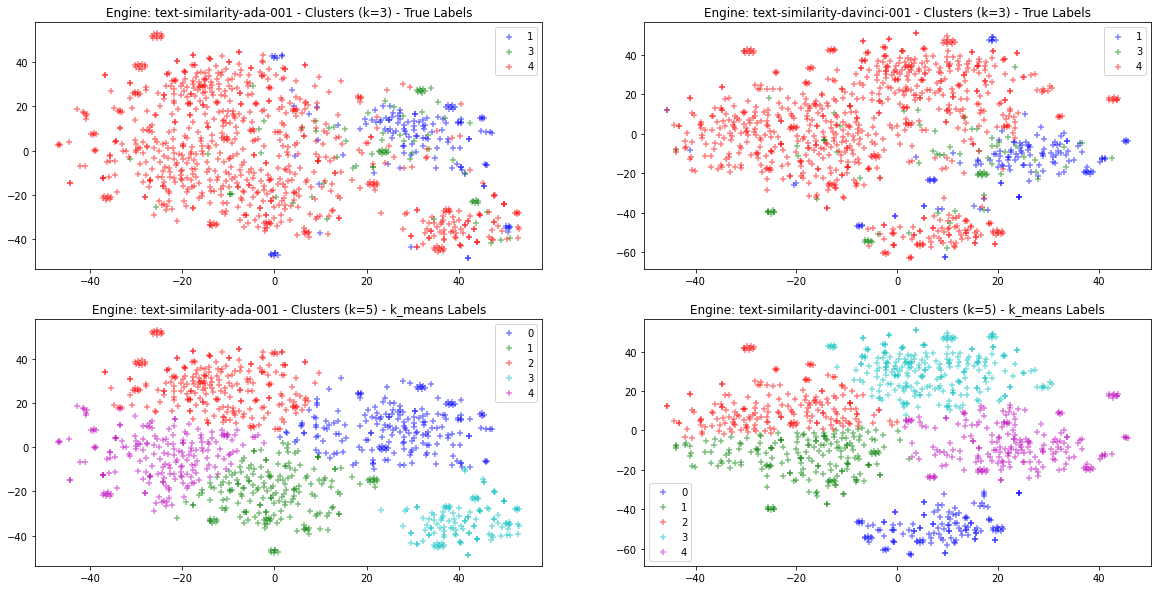

In [127]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels_true = df.label
labels_kmeans_1 = k_means(engine_name_1, df, 5)
labels_kmeans_2 = k_means(engine_name_2, df, 5)

plot(engine_name_1, ax1, df, labels_true, 'True Labels')
plot(engine_name_2, ax2, df, labels_true, 'True Labels')

plot(engine_name_1, ax3, df, labels_kmeans_1, 'k_means Labels')
plot(engine_name_2, ax4, df, labels_kmeans_2, 'k_means Labels')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


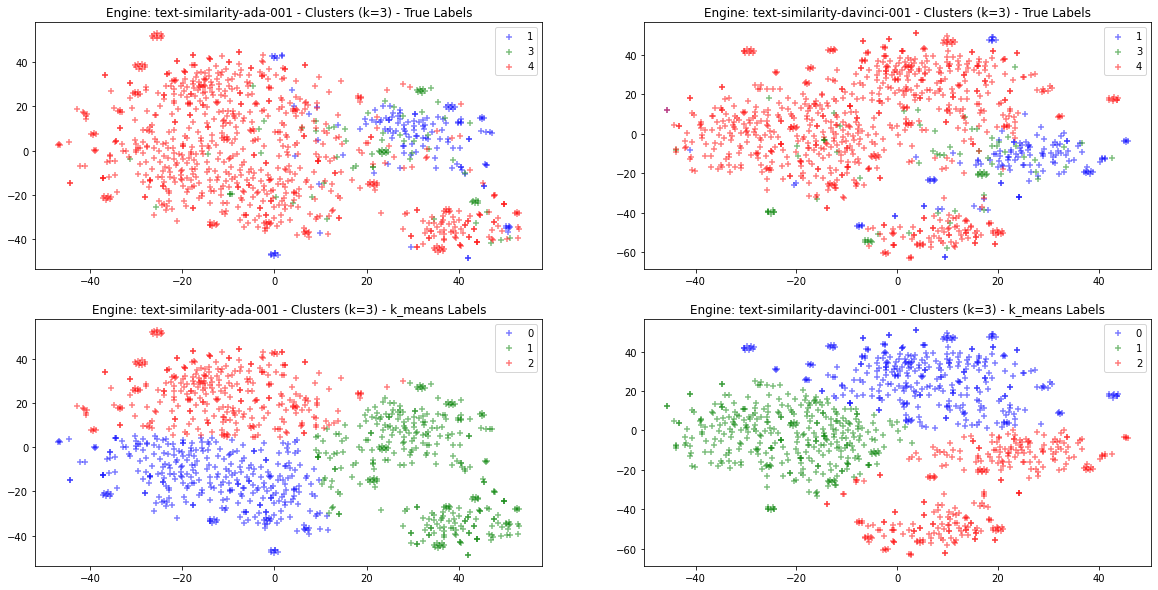

In [128]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels_true = df.label
labels_true[labels_true == 2] = 1
labels_true[labels_true == 5] = 4

labels_kmeans_1 = k_means(engine_name_1, df, 3)
labels_kmeans_2 = k_means(engine_name_2, df, 3)

plot(engine_name_1, ax1, df, labels_true, 'True Labels')
plot(engine_name_2, ax2, df, labels_true, 'True Labels')

plot(engine_name_1, ax3, df, labels_kmeans_1, 'k_means Labels')
plot(engine_name_2, ax4, df, labels_kmeans_2, 'k_means Labels')